In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.metrics import r2_score

In [3]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
 
data = pd.read_csv(r"..\zasoby\housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)
 
X = data.loc[:, 'LSTAT'].values.reshape(-1,1)
y = data['MEDV'].values

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
ransac = RANSACRegressor()
ransac.fit(X_train, y_train)
r2_ransac = ransac.score(X_test, y_test)

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
r2_lr = lr.score(X_test, y_test)

In [11]:
print(r2_lr, r2_ransac)

0.4172677421287858 0.3680290641401579


In [12]:
best_r2 = 0
for tmp_thres in range(10,41):
    tmp_ransac = RANSACRegressor(residual_threshold=tmp_thres)
    tmp_ransac.fit(X_train, y_train)
    tmp_r2 = tmp_ransac.score(X_test, y_test)
    if tmp_r2 > best_r2:
        best_r2 = tmp_r2
        ransac = tmp_ransac

In [14]:
print(r2_lr, best_r2)

0.4172677421287858 0.4460620334426557


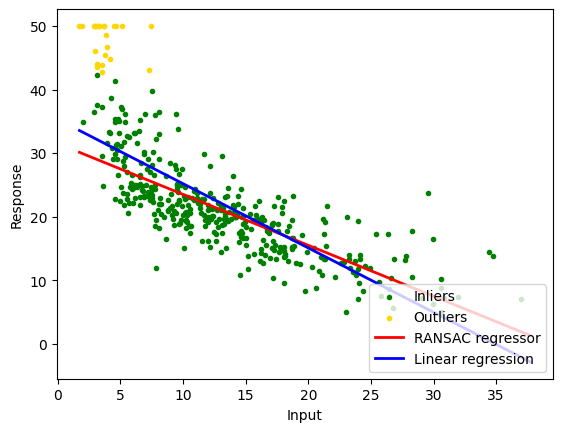

Ransac regression result: 0.4460620334426557
Linear regression result: 0.4172677421287858


In [17]:
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)
line_y_lr = lr.predict(line_X)
 
plt.scatter(X_train[ransac.inlier_mask_], y_train[ransac.inlier_mask_], color='green', marker='.',
            label='Inliers')
plt.scatter(X_train[~ransac.inlier_mask_], y_train[~ransac.inlier_mask_], color='gold', marker='.',
            label='Outliers')
 
plt.plot(line_X, line_y_ransac, color='red', linewidth=2, label='RANSAC regressor')
plt.plot(line_X, line_y_lr, color='blue', linewidth=2, label='Linear regression')
 
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()
 
r2_ransac = r2_score(y_test, ransac.predict(X_test))
print("Ransac regression result: {}".format(r2_ransac))
print("Linear regression result: {}".format(r2_lr))